In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MultiLabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

plt.style.use(['seaborn', 'seaborn-whitegrid'])
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dfEmployer = pd.read_csv('Islington_iwork_anonymous_data.csv')
dfEmployer.columns = dfEmployer.columns.str.lower()
dfEmployer.head(3)

,employer,registration_date,client_current_age,parent_on_enrolment,gender,ethnic_origin,has_disability,disability_details,religion,sexuality,highest_level_of_education,claiming_benefits,benefits,ward_name
0,No Outcome,22/07/2021,29,Blanks,Female,(C) Asian or Asian British - Any other Asian b...,No,NaN,Blanks,Prefer not to say sexuality,ISCED Level 6 (Bachelor's or equivalent level),No,Not in receipt of benefits,Whitechapel
1,No Outcome,24/08/2021,32,Blanks,Male,(C) Asian or Asian British - Any other Asian b...,No,NaN,Blanks,Prefer not to say sexuality,ISCED Level 6 (Bachelor's or equivalent level),No,Not in receipt of benefits,Stepney Green
2,No Outcome,13/05/2021,48,Blanks,Female,(D) Black or Black British - Other African,Blanks,NaN,Christian,Heterosexual,Blanks,Blanks,NaN,Forest


# 1. Data understanding

#### Produce a meta data table to show characteristics of each variable

In [ ]:
#data type
dfEmployer.dtypes

employer                       object
registration_date              object
client_current_age              int64
parent_on_enrolment            object
gender                         object
ethnic_origin                  object
has_disability                 object
disability_details            float64
religion                       object
sexuality                      object
highest_level_of_education     object
claiming_benefits              object
benefits                       object
ward_name                      object
dtype: object

In [ ]:
pd.DataFrame({
    'dType': dfEmployer.dtypes,
    'nUnique': dfEmployer.apply(pd.Series.nunique),
    'cardinality': (dfEmployer.apply(pd.Series.nunique) / dfEmployer.shape[0]).round(4),
    'nullRatio': (dfEmployer.isna().sum()/ dfEmployer.shape[0]).round(4),
}).to_excel('metadata.xlsx')

In [ ]:
# cardinality ratio
(dfEmployer.apply(pd.Series.nunique) / dfEmployer.shape[0]).round(4)

employer                      0.0589
registration_date             0.1782
client_current_age            0.0146
parent_on_enrolment           0.0006
gender                        0.0013
ethnic_origin                 0.0069
has_disability                0.0008
disability_details            0.0000
religion                      0.0025
sexuality                     0.0015
highest_level_of_education    0.0021
claiming_benefits             0.0006
benefits                      0.0155
ward_name                     0.0428
dtype: float64

In [ ]:
# observe distinct values of some variables
dfEmployer.parent_on_enrolment.unique()

array(['Blanks', 'No', 'Yes'], dtype=object)

In [ ]:
dfEmployer.gender.unique()

array(['Female', 'Male', 'Prefer not to say', 'Not Known', 'No response',
       'Transgender'], dtype=object)

In [ ]:
dfEmployer.sexuality.unique()

array(['Prefer not to say sexuality', 'Heterosexual',
       'No response to sexuality', 'Bisexual', 'Blanks', 'Gay / lesbian',
       'Other sexuality'], dtype=object)

In [ ]:
dfEmployer.ethnic_origin.unique()

array(['(C) Asian or Asian British - Any other Asian background',
       '(D) Black or Black British - Other African',
       '(D) Black or Black British - Any other Black background',
       '(A) White - Any other White background', '(A) White - British',
       '(C) Asian or Asian British - Indian',
       '(C) Asian or Asian British - Bangladeshi',
       '(D) Black or Black British - Caribbean',
       '(A) White - Turkish/ Turkish Cypriot',
       '(D) Black or Black British - Somali',
       '(B) Mixed - White and Black African',
       '(E) Other Ethnic Groups - Prefer not to say',
       '(E) Other Ethnic Groups - Any other background',
       '(A) White - Kurdish', '(E) Other Ethnic Group - Latin American',
       '(B) Mixed - White and Black Caribbean', '(A) White - Irish',
       '(E) Other Ethnic Group - Arab', '(E) Other Ethnic Groups - Arab',
       '(C) Asian or Asian British - Pakistani',
       '(E) Other Ethnic Groups - Latin American',
       '(D) Black or Black Brit

In [ ]:
dfEmployer.has_disability.unique()

array(['No', 'Blanks', 'Yes', 'Prefer not to say'], dtype=object)

In [ ]:
dfEmployer.religion.unique()

array(['Blanks', 'Christian', 'No religion / atheist', 'Muslim',
       'Prefer not to say religion', 'Other religion', 'Hindu',
       'No response religion', 'Buddhist', 'Jewish', 'Rastafarian',
       'Sikh'], dtype=object)

In [ ]:
dfEmployer.highest_level_of_education.unique()

array(["ISCED Level 6 (Bachelor's or equivalent level)", 'Blanks',
       "ISCED Level 7 (Master's or equivalent level)",
       'ISCED Level 2 (Lower secondary education)',
       'ISCED Level 3 (Upper secondary education)',
       'ISCED Level 4 (Post secondary - tertiary and non-tertiary)',
       'ISCED Level 5 (Short cycle tertiary education)',
       'ISCED Level 1 (Primary education)',
       'ISCED Level 0 (Early childhood education)',
       'ISCED Level 8 (Doctoral or equivalenmt level)'], dtype=object)

In [ ]:
dfEmployer.claiming_benefits.unique()

array(['No', 'Blanks', 'Yes'], dtype=object)

In [ ]:
dfEmployer.benefits.unique()[:20]

array(['Not in receipt of benefits', nan,
       'Prefer not to disclose benefits', 'Universal credit (UC)',
       'Other benefit',
       'Universal credit (UC), Working Tax Credit, Months on benefits',
       'Housing Benefit, Months on benefits',
       'Job seekers allowance (JSA), Months on benefits',
       'Income support (IS), Other benefit',
       'Employment support allowance (ESA)',
       'Personal independence payment (PI), Employment support allowance (ESA)',
       'Job seekers allowance (JSA)',
       'Personal independence payment (PI), Universal credit (UC)',
       'Personal independence payment (PI)',
       'Employment support allowance (ESA), Disability living allowance (DLA)',
       'Months on benefits, Not in receipt of benefits',
       'Months on benefits',
       'Employment support allowance (ESA), Months on benefits',
       'Income support (IS)',
       'Job seekers allowance (JSA), Housing Benefit, Months on benefits'],
      dtype=object)

In [ ]:
dfEmployer.ward_name.unique()[:20]

array(['Whitechapel', 'Stepney Green', 'Forest', nan,
       'Blackwall & Cubitt Town', 'Island Gardens', 'Mile End',
       'Canary Wharf', 'High Street', 'Bow East', "King's Park",
       'Lea Bridge', 'Forest Gate South', 'London Fields',
       'Farringdon Within', 'Clerkenwell', 'Bunhill', "St Peter's",
       'Enfield Lock', 'East Barnet'], dtype=object)

#### Describe missing or error data of each variable

In [ ]:
#null ratio
dfEmployer.isna().sum() / dfEmployer.shape[0]

employer                      0.000209
registration_date             0.000000
client_current_age            0.000000
parent_on_enrolment           0.000000
gender                        0.000000
ethnic_origin                 0.000000
has_disability                0.000000
disability_details            1.000000
religion                      0.000000
sexuality                     0.000000
highest_level_of_education    0.000000
claiming_benefits             0.000000
benefits                      0.523601
ward_name                     0.001462
dtype: float64

# 2. Data preparation

In [ ]:
#make a copy dataframe
df = dfEmployer.copy()

# feature selection
df = df.drop(columns=['registration_date', 'disability_details'])
df = df.fillna('')

# Target variable Employer into binary No Outcome - 0, has an outcome -1
df['employer'] = df.employer.map(lambda x: 0 if x == 'No Outcome' else 1)

# Gender into ordinal Female - 0, Male -1, Transgender=2, Prefer not to say=3, any others=4
def mapGender(x):
    if x == 'Female': y = 0
    elif x == 'Male': y = 1
    elif x == 'Transgender': y = 2
    elif x == 'Prefer not to say': y = 3
    else: y = 4
    return y
df['gender'] = df.gender.map(mapGender)

# Claiming_Benefits into ordinal No=0, Yes=1, Blank=2
def mapClamingBenefits(x):
    if x == 'No': y = 0
    elif x == 'Yes': y = 1
    else: y = 2
    return y
df['claiming_benefits'] = df.claiming_benefits.map(mapClamingBenefits)

# parent_on_enrolment
def mapParents(x):
    if x == 'No': y = 0
    elif x == 'Yes': y = 1
    else: y = 2
    return y
df['parent_on_enrolment'] = df['parent_on_enrolment'].map(mapParents)

# has_disability
def mapDisability(x):
    if x == 'No': y = 0
    elif x == 'Yes': y = 1
    elif x == 'Prefer not to say': y = 3
    else: y = 4
    return y
df['has_disability'] = df['has_disability'].map(mapDisability)

# Ethnic_Origin into ordinal number based on their occurrence in the data set in descending order

mapEthnic = df.ethnic_origin.unique()[::-1].tolist()
mapEthnic = {cat: idx for idx, cat in enumerate(mapEthnic)}
df['ethnic_origin'] = df.ethnic_origin.map(mapEthnic)

# WARD_NAME into ordinal numbers based on their occurrence in the data set in ascending order
mapWard = df.ward_name.unique().tolist()
mapWard = {cat: idx+1 for idx, cat in enumerate(mapWard)}
mapWard[np.nan] = 0
df['ward_name'] = df.ward_name.map(mapWard)

# Highest_Level_of_Education into ordinal numbers based on UK ISCED Level
eduLevel = df.highest_level_of_education.str.extract('(Level \d+)')[0].str.extract('(\d+)')
eduLevel = eduLevel.fillna(0.5).astype(float)
df['highest_level_of_education'] = eduLevel

#benifit
df['benefits'] = df['benefits'].str.split(', ')
encoder = MultiLabelBinarizer()
dfBenefits = pd.DataFrame(encoder.fit_transform(df.benefits), columns=encoder.classes_)
df = df.join(dfBenefits)

#encoding in order to use Machine Learning algorithms
encoderReligion = OrdinalEncoder()
df['religion'] = encoderReligion.fit_transform(df[['religion']])

encoderSexuality = OrdinalEncoder()
df['sexuality'] = encoderSexuality.fit_transform(df[['sexuality']])

columns = df.columns.str.lower()
columns = columns.str.replace(' ', '_', regex=False)
columns = columns.str.replace('(', '', regex=False)
columns = columns.str.replace(')', '', regex=False)
df.columns = columns
df = df.drop(columns=['', 'benefits'])

dfEmployer = df.copy()

dfEmployer.head()

,employer,client_current_age,parent_on_enrolment,gender,ethnic_origin,has_disability,religion,sexuality,highest_level_of_education,claiming_benefits,...,incapacity_benefit_ib,income_support_is,job_seekers_allowance_jsa,months_on_benefits,not_in_receipt_of_benefits,other_benefit,personal_independence_payment_pi,prefer_not_to_disclose_benefits,universal_credit_uc,working_tax_credit
0,0,29,2,0,21,0,0.0,6.0,6.0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,32,2,1,21,0,0.0,6.0,6.0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,48,2,0,11,4,2.0,3.0,0.5,2,...,0,0,0,0,0,0,0,0,0,0
3,0,55,2,1,16,0,0.0,4.0,7.0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,30,2,0,32,0,0.0,4.0,2.0,1,...,0,0,0,0,0,0,0,1,0,0


# 3. Data analysis

#### Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of age variable

In [ ]:
from scipy import stats

age = dfEmployer.client_current_age
sizeAge, (minAge, maxAge), meanAge, varAge, skewnessAge, kurtosisAge = stats.describe(age)
statistics = ['sizeAge', 'minAge', 'maxAge', 'meanAge', 'varAge', 'skewnessAge', 'kurtosisAge']
_ = [print(f'{statistic} = {globals()[statistic]:.4f}') for statistic in statistics]

sizeAge = 4788.0000
minAge = 0.0000
maxAge = 137.0000
meanAge = 37.3262
varAge = 198.4655
skewnessAge = 0.9040
kurtosisAge = 3.1877


#### Write a Python program to calculate and show correlation of each variable with the target variable 

In [ ]:
dfEmployer.corr().employer.to_frame().iloc[1:]

,employer
client_current_age,-0.066898
parent_on_enrolment,0.238253
gender,0.022208
ethnic_origin,0.004352
has_disability,-0.287484
religion,0.024797
sexuality,-0.029505
highest_level_of_education,0.258805
claiming_benefits,-0.261323
ward_name,-0.014923


# 4. Data exploration

#### Write a Python program to show histogram plot of any user chosen variables.

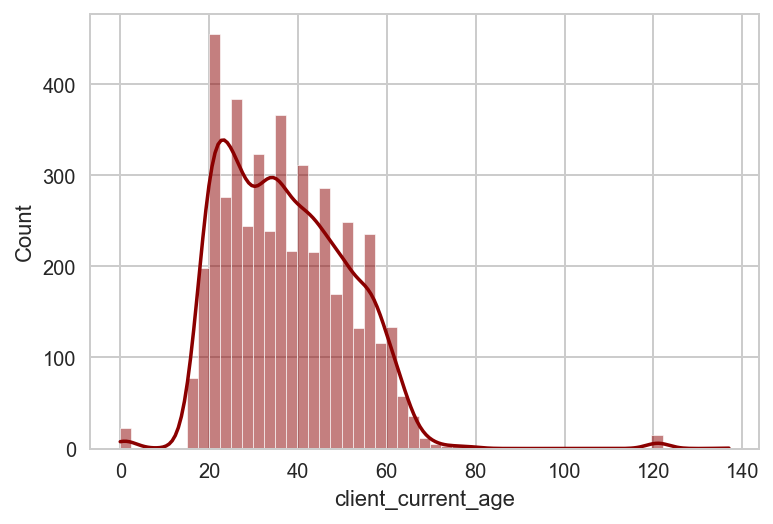

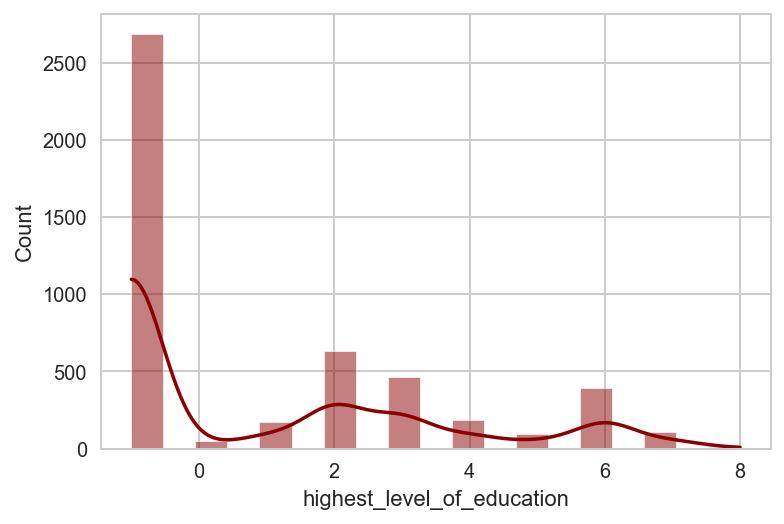

In [ ]:
# input a number of variables
variables = ['client_current_age', 'highest_level_of_education']

# plot
for variable in variables:
    plt.figure(figsize=(6,4))
    sns.histplot(df[variable], color='darkred', kde=True, stat='count', edgecolor='w')
    plt.show()

#### Write a Python program to show scatter plot for any two user chosen variables. 

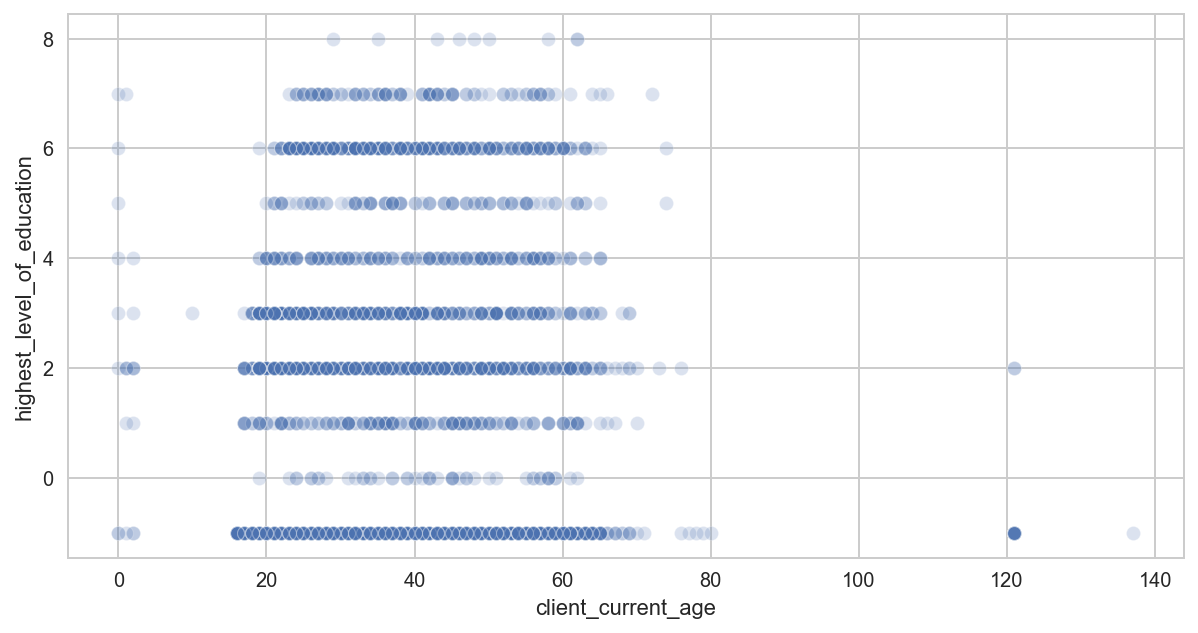

In [ ]:
# input any 2 variables
variablePair = ['client_current_age', 'highest_level_of_education']

# plot
x, y = variablePair
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x=x, y=y, alpha=0.2)
plt.show()

# 5. Data mining

#### Build any two Python Predictive Models to predict client employment using prepared variables from the iWork data

In [ ]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=7)

In [ ]:
xTrain.shape

(3830, 24)

In [ ]:
xTest.shape

(958, 24)

In [ ]:
algos = [
    KNeighborsClassifier(n_neighbors=2, weights='uniform'),
    DecisionTreeClassifier(max_depth=4, min_samples_leaf=5),
    GaussianNB(),
    LogisticRegression(),
    BernoulliNB(),
    RandomForestClassifier(max_depth=6),
    ExtraTreesClassifier(n_estimators=300, max_depth=8, max_features=0.2),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.3, min_samples_leaf=10, max_depth=6, max_features=0.1), 
    AdaBoostClassifier(n_estimators=300, learning_rate=0.3)
]

for algo in algos:
    model = algo.fit(xTrain, yTrain)
    yTrainProb = model.predict_proba(xTrain)[:, 1]
    yTestProb = model.predict_proba(xTest)[:, 1]
    aucTrain = roc_auc_score(yTrain, yTrainProb)
    aucTest = roc_auc_score(yTest, yTestProb)
    print(f'aucTrain={aucTrain:.4f} aucTest={aucTest:.4f} [{model.__class__.__name__}]')

aucTrain=0.9690 aucTest=0.6742 [KNeighborsClassifier]
aucTrain=0.8030 aucTest=0.7647 [DecisionTreeClassifier]
aucTrain=0.7856 aucTest=0.7660 [GaussianNB]
aucTrain=0.7976 aucTest=0.7906 [LogisticRegression]
aucTrain=0.7909 aucTest=0.7664 [BernoulliNB]
aucTrain=0.8850 aucTest=0.8175 [RandomForestClassifier]
aucTrain=0.8914 aucTest=0.8242 [ExtraTreesClassifier]
aucTrain=0.9800 aucTest=0.8279 [GradientBoostingClassifier]
aucTrain=0.8299 aucTest=0.7996 [AdaBoostClassifier]
